# TAREA 2 ANÁLISIS DE DATOS

Cail Vásquez

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels import robust
%matplotlib inline

In [2]:
data = pd.read_csv("https://github.com/MinCiencia/Datos-COVID19/blob/master/output/producto1/Covid-19.csv?raw=true", sep=',')

In [3]:
CasosRM = data[data["Region"]== "Metropolitana"]

In [4]:
CasosRM.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2021-11-08,2021-11-12,2021-11-15,2021-11-19,2021-11-22,2021-11-26,2021-11-29,2021-12-03,2021-12-06,Tasa
88,Metropolitana,13,Alhue,13502.0,7405.0,0.0,0.0,0.0,0.0,0.0,...,820.0,823.0,822.0,825.0,826.0,827.0,827.0,827.0,828.0,11181.6
89,Metropolitana,13,Buin,13402.0,109641.0,7.0,8.0,14.0,20.0,20.0,...,11453.0,11531.0,11595.0,11639.0,11685.0,11750.0,11786.0,11828.0,11841.0,10799.8
90,Metropolitana,13,Calera de Tango,13403.0,28525.0,6.0,7.0,7.0,7.0,8.0,...,2670.0,2704.0,2734.0,2762.0,2786.0,2803.0,2813.0,2824.0,2829.0,9917.6
91,Metropolitana,13,Cerrillos,13102.0,88956.0,0.0,4.0,4.0,5.0,11.0,...,8950.0,8998.0,9047.0,9087.0,9119.0,9178.0,9206.0,9213.0,9227.0,10372.5
92,Metropolitana,13,Cerro Navia,13103.0,142465.0,19.0,21.0,26.0,31.0,36.0,...,19144.0,19235.0,19316.0,19398.0,19457.0,19562.0,19606.0,19644.0,19666.0,13804.1


In [5]:
CasosRM.drop("Tasa", axis=1, inplace = True)

C:\Users\Kail\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [6]:
CasosPiv = CasosRM.melt(id_vars=["Region","Codigo region","Comuna",
                                   "Codigo comuna","Poblacion"], var_name="Fecha", value_name="Casos") 
CasosPiv.drop("Codigo region", axis=1, inplace = True)
CasosPiv.drop("Poblacion", axis=1, inplace = True)
CasosPiv.drop("Region", axis=1, inplace = True)
CasosPiv.drop("Codigo comuna", axis=1, inplace = True)
CasosPiv["Fecha"]=pd.to_datetime(CasosPiv['Fecha'])

In [7]:
CasosPiv.head()

,Comuna,Fecha,Casos
0,Alhue,2020-03-30,0.0
1,Buin,2020-03-30,7.0
2,Calera de Tango,2020-03-30,6.0
3,Cerrillos,2020-03-30,0.0
4,Cerro Navia,2020-03-30,19.0


In [8]:
Casos_Semana = CasosPiv.groupby('Comuna').resample('W-Mon', on='Fecha').sum().reset_index().sort_values(by='Fecha')
Casos_Semana

,Comuna,Fecha,Casos
0,Alhue,2020-03-30,0.0
267,Cerrillos,2020-03-30,0.0
3115,Pirque,2020-03-30,0.0
1602,La Pintana,2020-03-30,0.0
4450,Talagante,2020-03-30,0.0
...,...,...,...
2135,Lo Espejo,2021-12-06,23759.0
1423,La Cisterna,2021-12-06,22624.0
3292,Providencia,2021-12-06,22788.0
177,Buin,2021-12-06,23669.0


In [9]:
C_Las_Condes = Casos_Semana[Casos_Semana["Comuna"]=="Las Condes"]
C_Las_Condes.head()

,Comuna,Fecha,Casos
1869,Las Condes,2020-03-30,181.0
1870,Las Condes,2020-04-06,690.0
1871,Las Condes,2020-04-13,843.0
1872,Las Condes,2020-04-20,952.0
1873,Las Condes,2020-04-27,701.0


In [10]:
C_Las_Condes["DifCasos"] = C_Las_Condes["Casos"]-C_Las_Condes["Casos"].shift()

<ipython-input-10-dd4355a00b79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  C_Las_Condes["DifCasos"] = C_Las_Condes["Casos"]-C_Las_Condes["Casos"].shift()


In [11]:
C_Las_Condes.head()

,Comuna,Fecha,Casos,DifCasos
1869,Las Condes,2020-03-30,181.0,NaN
1870,Las Condes,2020-04-06,690.0,509.0
1871,Las Condes,2020-04-13,843.0,153.0
1872,Las Condes,2020-04-20,952.0,109.0
1873,Las Condes,2020-04-27,701.0,-251.0


In [15]:
Casos=C_Las_Condes[C_Las_Condes["DifCasos"]>0].reset_index()
Casos.drop('index', axis=1, inplace=True)
Casos.drop('Casos', axis=1, inplace=True)
Casos

,Comuna,Fecha,DifCasos
0,Las Condes,2020-04-06,509.0
1,Las Condes,2020-04-13,153.0
2,Las Condes,2020-04-20,109.0
3,Las Condes,2020-05-04,185.0
4,Las Condes,2020-05-11,478.0
...,...,...,...
81,Las Condes,2021-11-08,641.0
82,Las Condes,2021-11-15,618.0
83,Las Condes,2021-11-22,394.0
84,Las Condes,2021-11-29,287.0


<AxesSubplot:xlabel='Fecha', ylabel='DifCasos'>

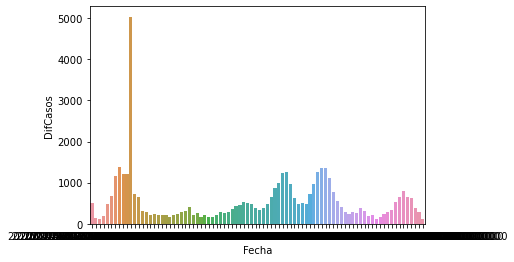

In [16]:
sns.barplot(x="Fecha", y="DifCasos", data=Casos)

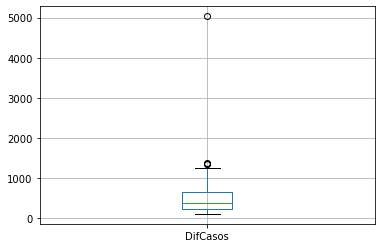

In [18]:
Boxplot = Casos.boxplot(column=['DifCasos'])

In [19]:
Casos_outliers=C_Las_Condes[C_Las_Condes["DifCasos"]>1300]
Casos_outliers

,Comuna,Fecha,Casos,DifCasos
1878,Las Condes,2020-06-01,4577.0,1373.0
1882,Las Condes,2020-06-29,9225.0,5033.0
1931,Las Condes,2021-06-07,32837.0,1345.0
1932,Las Condes,2021-06-14,34189.0,1352.0
